In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [ ]:
#reading the dataset
data = pd.read_csv("/fake_job_postings (1).csv")

In [ ]:
#Reading first 5 rows of dataset
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
#To know the no. of rows and columns
data.shape

(17880, 18)

In [ ]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
#to check whether the data set has null values
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
#removing unneccesary columns
#drop salary range because it contains more than 80% of null values
data.drop(['job_id','salary_range','telecommuting','has_company_logo','has_questions'], axis = 1, inplace = True)

In [ ]:
data.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
data.shape

(17880, 13)

In [ ]:
#filling the missing values in case of textual data with space
data.fillna(' ', inplace = True)

In [ ]:
#Again to check if the data has null values
data.isnull().sum()

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

# Exploratory Data Analysis

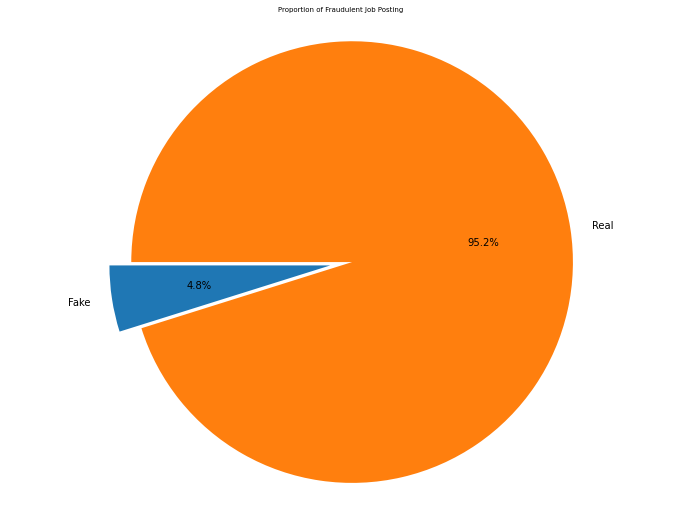

In [ ]:
#Percentage of jobs : Real or fake
labels = 'Fake','Real'
sizes = [data.fraudulent[data['fraudulent'] == 1].count(), data.fraudulent[data['fraudulent'] == 0].count()]
explode = (0,0.1)
fig1, ax1 = plt.subplots(figsize = (12,9))
ax1.pie(sizes, explode = explode, labels = labels, autopct='%1.1f%%', startangle = 180)
ax1.axis('equal')
plt.title("Proportion of Fraudulent Job Posting ", size = 7)
plt.show()

In [ ]:
#From the above analysis we saw that 95.2% job advertisements are real while 4.8% are fake

In [ ]:
#Visualizing Job Postings By Countries
#applying split function on location so as to get the country name
def split(location):
   l = location.split(',')
   return l[0]
data['country'] = data.location.apply(split)

In [ ]:
data.shape

(17880, 14)

In [ ]:
 #To check the number of unique countries
 data['country'].nunique()

91

In [ ]:
#Top 10 countries having maximum job advertisements
data['country'].value_counts()[:11]

US    10656
GB     2384
GR      940
CA      457
DE      383
        346
NZ      333
IN      276
AU      214
PH      132
NL      127
Name: country, dtype: int64

Text(0, 0.5, 'Number of Jobs')

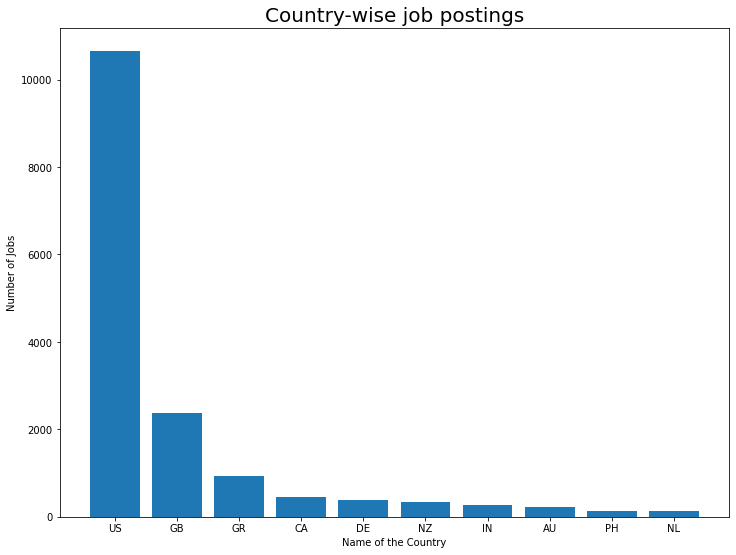

In [ ]:
country = dict(data.country.value_counts()[:11])
del country[' ']
plt.figure(figsize=(12,9))
plt.title('Country-wise job postings',size = 20)
plt.bar(country.keys(), country.values())
plt.xlabel('Name of the Country')
plt.ylabel('Number of Jobs')

In [ ]:
#We can see US has more than 10000 job postings

Text(0, 0.5, 'Number of Jobs')

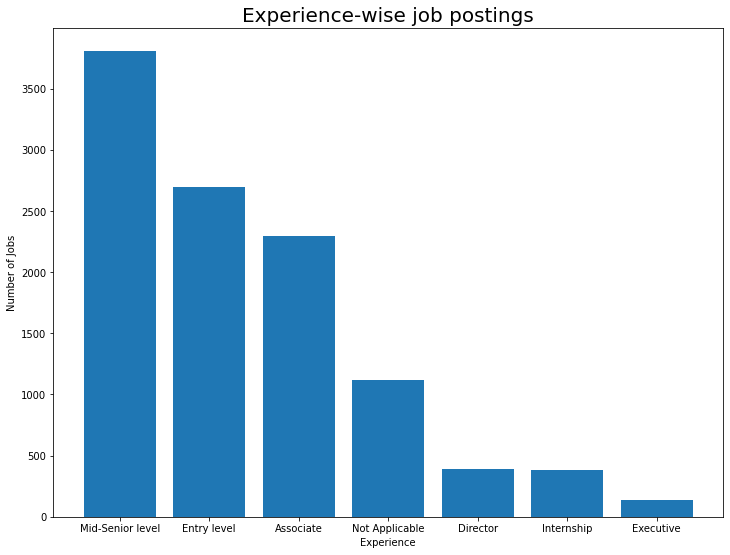

In [ ]:
#Now following the same thing country replaced by experience
experience = dict(data.required_experience.value_counts()[:11])
del experience[' ']
plt.figure(figsize=(12,9))
plt.title('Experience-wise job postings',size = 20)
plt.bar(experience.keys(),experience.values())
plt.xlabel('Experience')
plt.ylabel('Number of Jobs')

In [ ]:
#Top 10 most frequent jobs
data.title.value_counts()[:11]

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        75
Web Developer                                          66
Project Manager                                        62
Beauty & Fragrance consultants needed                  60
Name: title, dtype: int64

In [ ]:
#top 10 fake job posts
data[data.fraudulent == 1].title.value_counts()[:11]

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Data Entry                                                               9
Name: title, dtype: int64

In [ ]:
#top 10 real job posts
data[data.fraudulent == 0].title.value_counts()[:11]

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Beauty & Fragrance consultants needed                  60
Name: title, dtype: int64

In [ ]:
data.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent', 'country'],
      dtype='object')

In [ ]:
#joining the following columns
data["text"] = data['title']+ ' ' +data['location']+ ' ' +data['company_profile']+ ' ' +data['description']+ ' ' +data['requirements']+ ' ' +data['benefits']+ ' ' +data['industry']

del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['employment_type']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']

In [ ]:
data.head()

,fraudulent,text
0,0,"Marketing Intern US, NY, New York We're Food52..."
1,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,"Bill Review Manager US, FL, Fort Worth SpotSou..."


In [ ]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in data['text']])

In [ ]:
wordcloud = WordCloud(width = 600, height = 300, max_font_size = 120).generate(all_words)

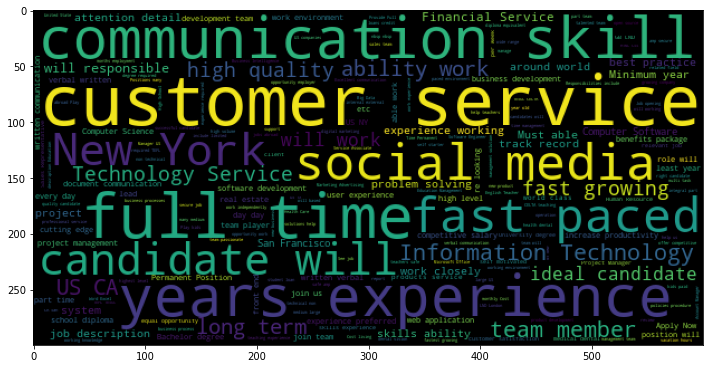

In [ ]:
plt.figure(figsize=(12,9))
plt.imshow(wordcloud)
plt.show()

In [ ]:
real_post = ' '.join([text for text in data['text'][data['fraudulent']==0]])

In [ ]:
wordcloud = WordCloud(width = 600, height = 300, max_font_size = 120).generate(real_post)

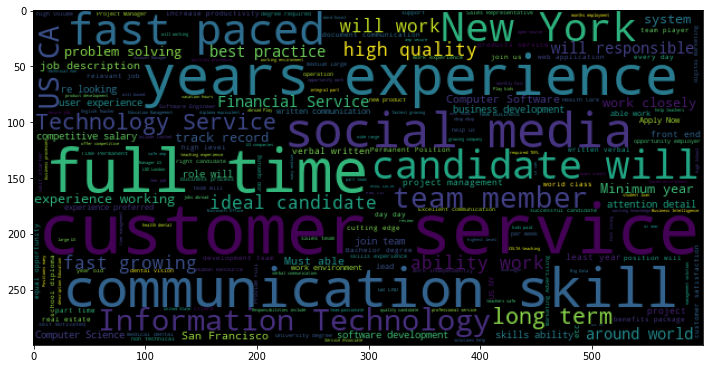

In [ ]:
plt.figure(figsize=(12,9))
plt.imshow(wordcloud)
plt.show()

In [ ]:
fraud_post = ' '.join([text for text in data['text'][data['fraudulent']==1]])

In [ ]:
wordcloud = WordCloud(width = 600, height = 300, max_font_size = 120).generate(fraud_post)

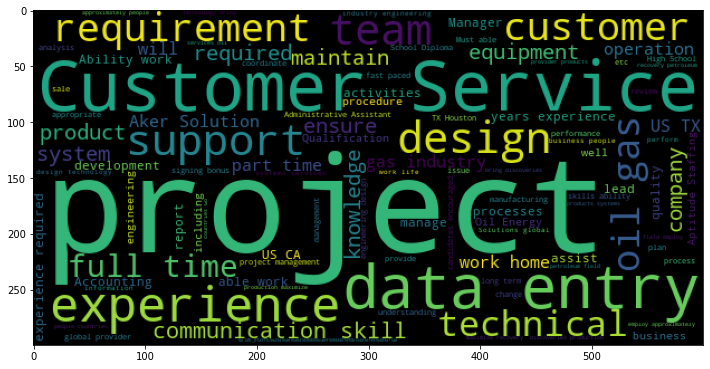

In [ ]:
plt.figure(figsize=(12,9))
plt.imshow(wordcloud)
plt.show()

# Data Preparation

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
#coverting to lower
data['text'] = data['text'].apply(lambda x:x.lower())

In [ ]:
#removing stopwords from data set
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in(stop_words) ]))

In [ ]:
data['text'][0]

"marketing intern us, ny, new york we're food52, we've created groundbreaking award-winning cooking site. support, connect, celebrate home cooks, give everything need one place.we top editorial, business, engineering team. we're focused using technology find new better ways connect people around specific food interests, offer superb, highly curated information food cooking. attract talented home cooks contributors country; also publish well-known professionals like mario batali, gwyneth paltrow, danny meyer. partnerships whole foods market random house.food52 named best food website james beard foundation iacp, featured new york times, npr, pando daily, techcrunch, today show.we're located chelsea, new york city. food52, fast-growing, james beard award-winning online food community crowd-sourced curated recipe hub, currently interviewing full- part-time unpaid interns work small team editors, executives, developers new york city headquarters.reproducing and/or repackaging existing food

In [ ]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data.text, data.fraudulent, test_size = 0.3)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [ ]:
x_train_dtm = vect.transform(x_train)

In [ ]:
x_train_dtm

<12516x86466 sparse matrix of type '<class 'numpy.int64'>'
	with 2328507 stored elements in Compressed Sparse Row format>

# Model Building and Evaluation

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
x_test_dtm = vect.transform(x_test)
x_test_dtm

<5364x86466 sparse matrix of type '<class 'numpy.int64'>'
	with 969007 stored elements in Compressed Sparse Row format>

In [ ]:
#Naive bayes Classifier
nb = MultinomialNB()
nb.fit(x_train_dtm, y_train)


MultinomialNB()

In [ ]:
y_pred_nb = nb.predict(x_test_dtm)

In [ ]:
accuracy_score(y_test, y_pred_nb)

0.970917225950783

In [ ]:
#decison tree classifier
dt = DecisionTreeClassifier()
dt.fit(x_train_dtm, y_train)


DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt.predict(x_test_dtm)

In [ ]:
accuracy_score(y_test, y_pred_dt)

0.9755779269202088

 Thus,We have a build a model of 97% Accuracy